# Homework 5

In [1]:
#imports
from importlib import reload

import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import ventilated_thermocline

In [2]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

In [59]:
def contour_plot(field, title=None, cmap='jet', nlevels=8, clabel=True, ax=None,
                x=None, y=None, shadx=None, shady=None,
                outx=None, outy=None,
                poolx=None, pooly=None):
    cm = plt.get_cmap(cmap)
    if ax is None:
        fig = plt.figure(figsize=(10,10))
        ax = plt.gca()

    if x is not None:
        CS = ax.contour(field.T, levels=nlevels, cmap=cm,
                       extent=(x.min(), x.max(), y.min(), y.max()))
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())
    else:
        CS = ax.contour(field.T, levels=nlevels, cmap=cm)
        
    # Lines
    if shadx is not None:
        ax.plot(shadx, shady, 'k-', label='Shadow zone')

    if outx is not None:
        ax.plot(outx, outy, 'k--', label=r'$\theta_X$')    

    if poolx is not None:
        ax.plot(poolx, pooly, 'k:', label='Pool')    

        
    if clabel:
        ax.clabel(CS, inline=True, fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=18.)
    
    # Legend
    legend = ax.legend(loc='upper left', scatterpoints=1, borderpad=0.2,
                   fontsize=13.)


    #ax.set_aspect('equal', 'datalim')

# North Atlantic

In [44]:
reload(ventilated_thermocline)
xarr, yarr, shadx, shady, outx, outy, poolx, pooly, psi1, psi2, ixt, iyt, h, hp1 = ventilated_thermocline.two_layers()

/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:101: RuntimeWarning: invalid value encountered in double_scalars
  #
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:164: RuntimeWarning: divide by zero encountered in double_scalars
  phi_shadow=phie*(1-fac*gamma1*(1-f[j]/f2)**2*H2*H2/gamma2)
/tank/xavier/Oceanography/Classes/os_classes/OCEA-201/hw/5/ventilated_thermocline.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  fac1=Gamma12*(1-f[j]/f2)**2


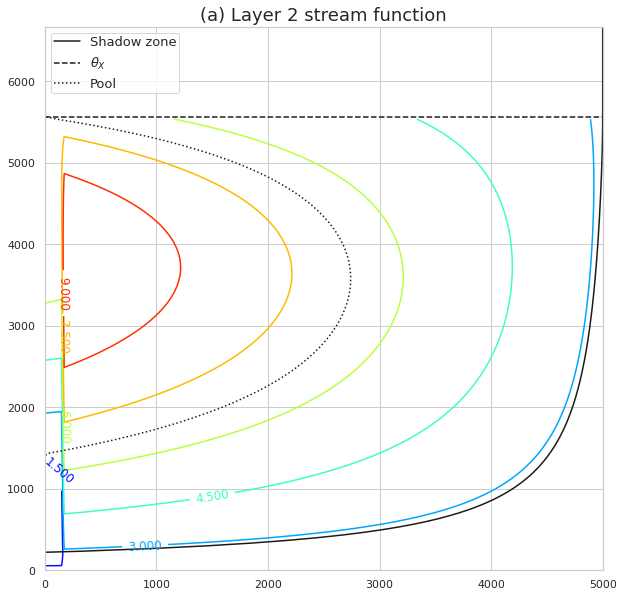

In [60]:
contour_plot(psi2, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
            title='(a) Layer 2 stream function')

In [7]:
np.sum(np.isfinite(psi1))

33567

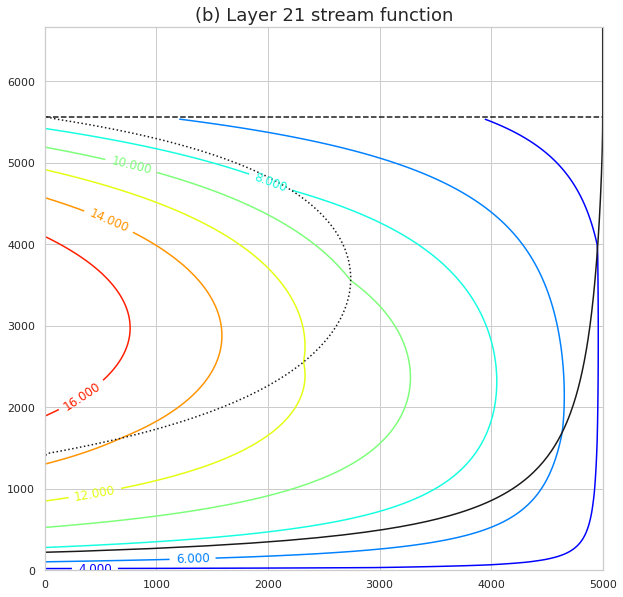

In [56]:
contour_plot(psi1, x=xarr, y=yarr, shadx=shadx, shady=shady,
            outx=outx, outy=outy, poolx=poolx, pooly=pooly,
                         title='(b) Layer 21 stream function')

# Heights